<a href="https://colab.research.google.com/github/dirtycomputer/Discrete-Cosine-Transform/blob/main/Discrete_Cosine_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import shutil

In [2]:
# 打印矩阵信息
def helper(array):
  print(array.shape, array.max(), array.min(), array.dtype)

In [22]:
# 保存血管图片
img_url = 'https://www.revieweducationgroup.com/CMSImagesContent/2019/03/089_ro0319_f6_OSC-1-modal.jpg'
response = requests.get(img_url, stream=True)
with open('image.jpg', 'wb') as out_file:
    shutil.copyfileobj(response.raw, out_file)
del response

In [30]:
# 读取图片
img = cv2.imread("/content/image.jpg",0).astype(np.float64)
helper(img)
height, width = img.shape[0], img.shape[1]

(900, 1000) 219.0 0.0 float64


In [36]:
# 进行DCT变换 会得到与原图像尺寸相同的频域信息
img_dct = cv2.dct(img)
helper(img_dct)

(900, 1000) 63227.58935807273 -24366.33182314604 float64


In [37]:
# 可视化幅值 绝对值取对数
img_dct_log = np.log(abs(img_dct))
helper(img_dct_log)

(900, 1000) 11.05449602535471 -15.279929915680816 float64


In [50]:
# 压缩 保留左上角低频 将右下角高频置0
img_dct_crop = img_dct
# 频域长宽各压缩一倍 压缩至1%
factor = 10
for i in range(height):
  for j in range(width):
    if (i > height // factor) or (j > width // factor):
      img_dct_crop[i][j] = 0
img_dct_log_crop = np.log(abs(img_dct_crop))
helper(img_dct_log_crop)

(900, 1000) 11.05449602535471 -inf float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


In [51]:
# DCT逆变换 用压缩信息重构图像
img_idct = cv2.idct(img_dct_crop)
helper(img_idct)

(900, 1000) 163.86772767556315 -3.194758698626917 float64


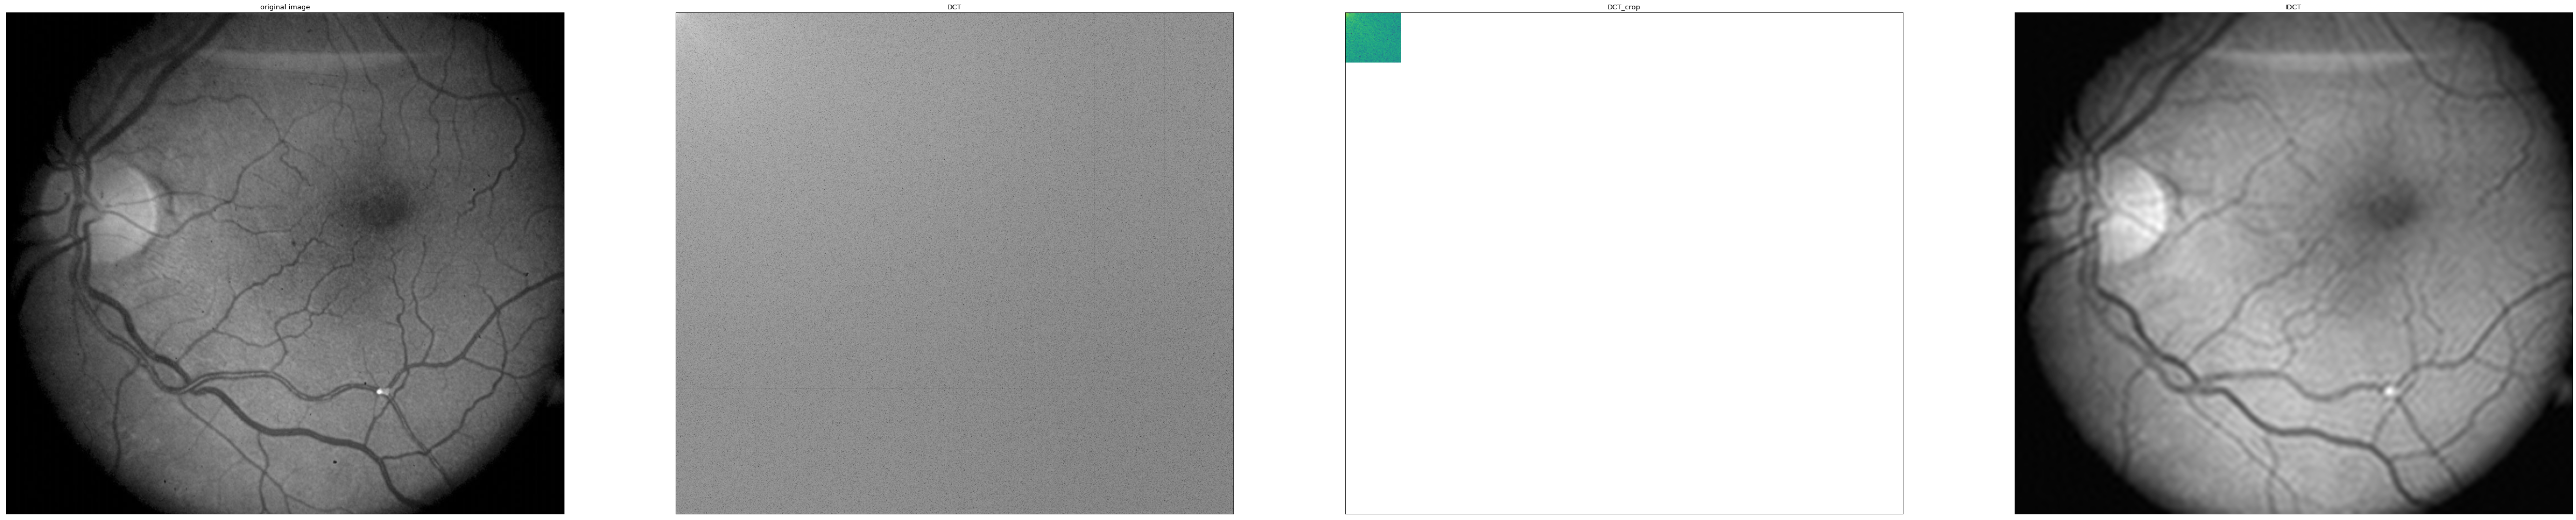

In [52]:
# 原图像
# 频域信息（左上低频 右下高频）
# 裁剪后的频域信息（裁剪掉的为白色）
# 使用裁剪后的信息重构图像

plt.figure(figsize=(80, 60), dpi=80)
plt.subplot(141)
plt.imshow(img,'gray')
plt.title('original image'),plt.xticks([]),plt.yticks([])
plt.subplot(142)
plt.imshow(img_dct_log,'gray')
plt.title('DCT'),plt.xticks([]),plt.yticks([])
plt.subplot(143)
plt.imshow(img_dct_log_crop)
plt.title('DCT_crop'),plt.xticks([]),plt.yticks([])
plt.subplot(144)
plt.imshow(img_idct,'gray')
plt.title('IDCT'),plt.xticks([]),plt.yticks([])
plt.show()